In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

# Importing modelling libraries
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV

In [2]:
df=pd.read_csv('datos_clean.csv', sep=';')
df

,SegmentoDesc,NumeroDoctoIdentificacion,TipoDoctoIdentificacionCD,SexoDesc,Edad,EstadoCivilDesc,ProfesionDesc,ClienteFallecido,indClienteEsEmpleado,TipoClienteDesc,...,NumCreditos,SaldoCreditos,NumeroCuentasAhorroActivas,SaldoCuentasAhorroActivas,NumeroCuentasAhorroInactivas,SaldoCuentasAhorroInactivas,SaldoTotalCartera,NumeroOperacionesCartera,NumeroProductosCaptacion,SaldoTotalCaptaciones
0,AGROPECUARIA,248440-12114840,CC,MASCULINO,41.0,CASADO,SIN PROFESION,S/D,N,Cliente Comercialmente Gestionable,...,1.0,5999542.0,1.0,4526.0,0.0,0.0,5999542.0,1.0,1.0,4526.0
1,AGROPECUARIA,516132-22586048,CC,MASCULINO,43.0,SOLTERO,SIN PROFESION,S/D,N,Cliente Comercialmente Gestionable,...,2.0,5674272.0,1.0,10135.0,0.0,0.0,5674272.0,2.0,1.0,10135.0
2,AGROPECUARIA,718406-41302180,CC,FEMENINO,43.0,SOLTERO,SIN PROFESION,S/D,N,Cliente Comercialmente Gestionable,...,0.0,0.0,1.0,2413.7,1.0,1458.0,0.0,0.0,2.0,3871.7
3,AGROPECUARIA,18386-44382106,CC,MASCULINO,57.0,SOLTERO,SIN PROFESION,S/D,N,Cliente Comercialmente Gestionable,...,1.0,4810806.0,0.0,0.0,2.0,11481.0,4810806.0,1.0,2.0,11481.0
4,AGROPECUARIA,371740-4897820,CC,FEMENINO,43.0,SOLTERO,ZOOTECNISTA,S/D,N,Cliente Comercialmente Gestionable,...,0.0,0.0,1.0,16336.0,0.0,0.0,0.0,0.0,1.0,16336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253585,AGROPECUARIA,061115-12886624,CC,MASCULINO,38.0,SOLTERO,SIN PROFESION,S/D,N,Cliente Comercialmente Gestionable,...,2.0,1607298.0,0.0,0.0,0.0,0.0,1607298.0,2.0,0.0,0.0
253586,AGROPECUARIA,728316-91926038,CC,FEMENINO,42.0,UNION LIBRE,SIN PROFESION,S/D,N,Cliente Comercialmente Gestionable,...,1.0,9809080.0,0.0,0.0,1.0,1.0,9809080.0,1.0,1.0,1.0
253587,AGROPECUARIA,521494-06533178,CC,MASCULINO,48.0,SEPARADO,SIN PROFESION,S/D,N,Cliente Comercialmente Gestionable,...,2.0,10428570.0,1.0,926.0,0.0,0.0,10428570.0,2.0,1.0,926.0
253588,AGROPECUARIA,985193-52738110,CC,FEMENINO,53.0,SOLTERO,SIN PROFESION,S/D,N,Cliente Comercialmente Gestionable,...,0.0,0.0,2.0,11985.0,1.0,1654.0,0.0,0.0,3.0,13639.0


In [3]:
df2=df.drop(['SegmentoDesc','NumeroDoctoIdentificacion','TipoDoctoIdentificacionCD','TipoClienteDesc','ClienteFallecido'], axis=1)
df2.head()

,SexoDesc,Edad,EstadoCivilDesc,ProfesionDesc,indClienteEsEmpleado,ValorActivos,ValorEgresos,ValorIngresos,ValorPatrimonio,TotalPasivos,NumCreditos,SaldoCreditos,NumeroCuentasAhorroActivas,SaldoCuentasAhorroActivas,NumeroCuentasAhorroInactivas,SaldoCuentasAhorroInactivas,SaldoTotalCartera,NumeroOperacionesCartera,NumeroProductosCaptacion,SaldoTotalCaptaciones
0,MASCULINO,41.0,CASADO,SIN PROFESION,N,55000000.0,500000.0,1800000.0,55000000.0,0.0,1.0,5999542.0,1.0,4526.0,0.0,0.0,5999542.0,1.0,1.0,4526.0
1,MASCULINO,43.0,SOLTERO,SIN PROFESION,N,28000000.0,500000.0,1800000.0,21000000.0,5674000.0,2.0,5674272.0,1.0,10135.0,0.0,0.0,5674272.0,2.0,1.0,10135.0
2,FEMENINO,43.0,SOLTERO,SIN PROFESION,N,34000000.0,585000.0,2700000.0,34000000.0,0.0,0.0,0.0,1.0,2413.7,1.0,1458.0,0.0,0.0,2.0,3871.7
3,MASCULINO,57.0,SOLTERO,SIN PROFESION,N,54000000.0,390000.0,2600000.0,54000000.0,0.0,1.0,4810806.0,0.0,0.0,2.0,11481.0,4810806.0,1.0,2.0,11481.0
4,FEMENINO,43.0,SOLTERO,ZOOTECNISTA,N,110000000.0,1200000.0,3000000.0,110000000.0,0.0,0.0,0.0,1.0,16336.0,0.0,0.0,0.0,0.0,1.0,16336.0


In [4]:
# Se realiza un análisis de los valores únicos de las columnas con variables categóricas, con el objetivo de identificar
# inconsistencias y reemplazar por variables númericas para tenerlas en cuenta detro del modelo.
print('Valores únicos de la columna SexoDesc:')
print()
print(df2['SexoDesc'].unique())
print()
print('Valores únicos de la columna indClienteEsEmpleado:')
print()
print(df2['indClienteEsEmpleado'].unique())
print()
print('Valores únicos de la columna EstadoCivilDesc:')
print()
print(df2['EstadoCivilDesc'].unique())
print()
print('Valores únicos de la columna ProfesionDesc:')
print()
print(df2['ProfesionDesc'].unique())
print()

Valores únicos de la columna SexoDesc:

['MASCULINO' 'FEMENINO']

Valores únicos de la columna indClienteEsEmpleado:

['N' 'S']

Valores únicos de la columna EstadoCivilDesc:

['CASADO' 'SOLTERO' 'UNION LIBRE' 'SEPARADO' 'VIUDO' 'DIVORCIADO']

Valores únicos de la columna ProfesionDesc:

['SIN PROFESION' 'ZOOTECNISTA' 'AGRICULTOR' 'INGENIERO DE SISTEMAS'
 'ENFERMERIA' 'TECNICO PROFESIONAL - AGRONOMIA, VETERINARIA Y AFINES'
 'ADMINISTRADOR DEL MEDIO AMBIENTE' 'ADMINISTRADOR AGROPECUARIO' 'DOCENTE'
 'TECNICO PROFESIONAL - ECONOMIA, ADMINISTRACION Y CONTADURIA'
 'INGENIERO ELECTRICO' 'SALUD OCUPACIONAL' 'ADMINISTRADOR DE  EMPRESAS'
 'TECNOLOGO - AGRONOMIA, VETERINARIA Y AFINES' 'QUIMICO'
 'TECNICO PROFESIONAL - CIENCIAS DE LA SALUD' 'ADMINISTRADOR PUBLICO'
 'INGENIERO AGROAMBIENTAL' 'ARQUITECTO'
 'TECNOLOGO - INGENIERIA, ARQUITECTURA, URBANISMO Y AFINES' 'CONTADOR'
 'LICENCIADO' 'ABOGADO' 'INGENIERO CIVIL' 'TRABAJO SOCIAL'
 'TECNOLOGO - CIENCIAS DE LA SALUD' 'INGENIERO ELECTRONICO'
 'ADMI

In [5]:
df3=df2

#Se realiza un cambio de las variables categóricas para poder aplicarlo en el entrenamiento del modelo.
df3['SexoDesc']=df3['SexoDesc'].map({'FEMENINO':1, 'MASCULINO':0})

#Se realiza un cambio de las variables categóricas para poder aplicarlo en el entrenamiento del modelo.
df3['EstadoCivilDesc']=df3['EstadoCivilDesc'].map({'SOLTERO':0, 'SEPARADO':1, 'CASADO':2, 'UNION LIBRE':3, 'VIUDO':4,'DIVORCIADO':5})

#Se realiza un cambio de las variables categóricas para poder aplicarlo en el entrenamiento del modelo.
df3['indClienteEsEmpleado']=df3['indClienteEsEmpleado'].map({'N':0, 'S':1})

#Se realiza un cambio de las variables categóricas para poder aplicarlo en el entrenamiento del modelo.
df3['ProfesionDesc']=df3['ProfesionDesc'].map({'SIN PROFESION':0, 'INGENIERO MECANICO':1,
       'ADMINISTRADOR DE  EMPRESAS':2, 'AGRICULTOR':3, 'ODONTOLOGO':4,
       'FARMACIA':5, 'ADMINISTRADOR AGROPECUARIO':6, 'ENFERMERIA':7,
       'ZOOTECNISTA':8, 'CRIMINALISTICA':9, 'GANADERO':10, 'CONTADOR':11,
       'MEDICO GENERAL':12, 'ADMINISTRADOR DEL MEDIO AMBIENTE':13,
       'INGENIERO AMBIENTAL':14, 'DOCENTE':15,
       'TECNOLOGO - AGRONOMIA, VETERINARIA Y AFINES':16, 'FISIOTERAPISTA':17,
       'TECNICO PROFESIONAL - AGRONOMIA, VETERINARIA Y AFINES':18,
       'INGENIERO CIVIL':19, 'ABOGADO':20, 'ECONOMISTA':21,
       'TECNOLOGO - ECONOMIA, ADMINISTRACION, CONTADURIA Y AFINES':22,
       'INGENIERO AGRONOMICO':23, 'MERCADEO':24,
       'TECNICO PROFESIONAL - INGENIERIA, ARQUITECTURA Y URBANISMO':25,
       'AGRONOMO':26, 'ADMINISTRADOR PUBLICO':27,
       'TECNICO PROFESIONAL - ECONOMIA, ADMINISTRACION Y CONTADURIA':28,
       'TECNICO PROFESIONAL - CIENCIAS SOCIALES, DERECHO Y POLITICA':29,
       'INGENIERO ELECTRICO':30, 'INGENIERO INDUSTRIAL':31,
       'TECNICO PROFESIONAL - CIENCIAS DE LA SALUD':32, 'SALUD OCUPACIONAL':33,
       'ADMINISTRADOR BANCARIO Y FINANCIERO':34, 'INGENIERO AGRICOLA':35,
       'TECNOLOGO - CIENCIAS DE LA SALUD':36, 'SOCIOLOGO':152, 'ARQUITECTO':37,
       'PSICOLOGO':38, 'ADMINISTRADOR COMERCIAL':39, 'HOTELERIA Y TURISMO':40,
       'DEPORTE Y ACTIVIDAD FISICA':41, 'MEDICO VETERINARIO':42, 'TEOLOGO':43,
       'LICENCIADO':44, 'COMUNICACION SOCIAL':45, 'DISENO GRAFICO':46,
       'INGENIERO DE SISTEMAS':47, 'CIENCIAS':48,
       'INGENIERO DE PRODUCCION AGRICOLA':49, 'INGENIERO AGROFORESTAL':50,
       'PILOTO CIVIL':51, 'FISICO':52, 'CIENCIAS MILITARES':53,
       'ADMINISTRADOR HOTELERO':54, 'CIENCIAS SOCIALES':55, 'BACTERIOLOGO':56,
       'INGENIERO DE ALIMENTOS':57, 'BIOLOGO':58,
       'TECNOLOGO - INGENIERIA, ARQUITECTURA, URBANISMO Y AFINES':59,
       'INGENIERO ELECTRONICO':60, 'INGENIERO AGROAMBIENTAL':61,
       'DISENO INDUSTRIAL':62, 'INGENIERO COMERCIAL':63, 'TRABAJO SOCIAL':64,
       'GASTRONOMO Y COCINA PROFESIONAL':65, 'TELECOMUNICACIONES':66,
       'INGENIERO':67, 'QUIMICO':68, 'ADMINISTRADOR DE COMERCIO EXTERIOR':69,
       'TECNICO PROFESIONAL - BELLAS ARTES':70, 'PUBLICISTA':71,
       'MEDICO OPTOMETRA':72, 'SECRETARIA':73, 'AGROLOGO':74, 'PRE ESCOLAR':75,
       'TECNICO PROFESIONAL - CIENCIAS DE LA EDUCACION':76,
       'INGENIERO QUIMICO':77, 'BELLAS ARTES':78, 'FINANZAS':79,
       'ADMINISTRADOR LOGISTICO':80, 'ADMINISTRADOR EN SALUD':81, 'ANTROPOLOGO':82,
       'TERAPIA FISICA':83, 'TECNOLOGO - BELLAS ARTES':84,
       'TECNICO PROFESIONAL - MATEMATICAS Y CIENCIAS NATURALES':85,
       'ADMINISTRADOR DE OBRAS CIVILES':86,
       'TECNOLOGO - CIENCIAS DE LA EDUCACION':87, 'INGENIERO DE ACUICULTURA':88,
       'TECNOLOGO - MATEMATICAS Y CIENCIAS NATURALES':89,
       'ADMINISTRADOR INFORMATICO':90, 'COMERCIO EXTERIOR':91,
       'MEDICO OFTALMOLOGO':92, 'FILOSOFO':93, 'CIENCIAS POLITICAS':94,
       'DISENO DE MODAS':95, 'MEDICO CIRUJANO PLASTICO':96, 'ECOLOGO':97,
       'MILITAR':98, 'AGROZOOTECNIO':99, 'CINE Y TELEVISION':100,
       'LENGUAS CLASICAS':101, 'GEOLOGO':102, 'COSMETOLOGO':103,
       'MUSICA INSTRUMENTAL':104,
       'TECNOLOGO - HUMANIDADES Y CIENCIAS RELIGIOSAS':105,
       'NEGOCIOS INTERNACIONALES':106, 'GEOGRAFO':107, 'FOTOGRAFO':108, 'LITERATURA':109,
       'MATEMATICO':110, 'INGENIERO DEL MEDIO AMBIENTE':111,
       'CIENCIAS DEL DEPORTE':112, 'IDIOMAS':113, 'INSTRUMENTACION QUIRURGICA':114,
       'FONOAUDIOLOGO':115, 'PERIODISTA':116,
       'RELACIONES PUBLICAS E INSTITUCIONALES':117,
       'TECNOLOGO - CIENCIAS SOCIALES, DERECHO Y POLITICA':118,
       'NUTRICION Y DIETETICA':119, 'MEDICO RADIOLOGO':120,
       'DECORADOR DE INTERIORES':121, 'MEDICO PEDIATRA':122,
       'RELACIONES INTERNACIONALES':123, 'CONSTRUCCION':124, 'MEDICO NEUROLOGO':125,
       'TRADUCCION SIMULTANEA':126, 'TERAPIA OCUPACIONAL':127, 'LENGUAS MODERNAS':128,
       'MEDICO GINECOLOGO':129, 'INGENIERO ADMINISTRATIVO':130, 'BIBLIOTECOLOGO':131,
       'HISTORIADOR':132, 'MICROBIOLOGIA':133, 'INGENIERO PESQUERO':134,
       'INGENIERO CATASTRAL':135, 'BIOINGENIERO':136, 'MEDICO ORTOPEDISTA':137,
       'MEDICO OTORRINORALINGOLOGO':138, 'RECREACIONISTA':139,
       'ADMINISTRADOR DEPORTIVO':140, 'GERONTOLOGO':141, 'MEDICO CARDIOLOGO':142,
       'TERAPIA RESPIRATORIA':143, 'INGENIERO FINANCIERO':145, 'MEDICO UROLOGO':146,
       'MEDICO DERMATOLOGO':147, 'ESTADISTICO':148, 'MEDICO PATOLOGO':149,
       'MEDICO BACTERIOLOGO':150, 'MEDICO LEGAL':151})

df3.head()

,SexoDesc,Edad,EstadoCivilDesc,ProfesionDesc,indClienteEsEmpleado,ValorActivos,ValorEgresos,ValorIngresos,ValorPatrimonio,TotalPasivos,NumCreditos,SaldoCreditos,NumeroCuentasAhorroActivas,SaldoCuentasAhorroActivas,NumeroCuentasAhorroInactivas,SaldoCuentasAhorroInactivas,SaldoTotalCartera,NumeroOperacionesCartera,NumeroProductosCaptacion,SaldoTotalCaptaciones
0,0,41.0,2,0,0,55000000.0,500000.0,1800000.0,55000000.0,0.0,1.0,5999542.0,1.0,4526.0,0.0,0.0,5999542.0,1.0,1.0,4526.0
1,0,43.0,0,0,0,28000000.0,500000.0,1800000.0,21000000.0,5674000.0,2.0,5674272.0,1.0,10135.0,0.0,0.0,5674272.0,2.0,1.0,10135.0
2,1,43.0,0,0,0,34000000.0,585000.0,2700000.0,34000000.0,0.0,0.0,0.0,1.0,2413.7,1.0,1458.0,0.0,0.0,2.0,3871.7
3,0,57.0,0,0,0,54000000.0,390000.0,2600000.0,54000000.0,0.0,1.0,4810806.0,0.0,0.0,2.0,11481.0,4810806.0,1.0,2.0,11481.0
4,1,43.0,0,8,0,110000000.0,1200000.0,3000000.0,110000000.0,0.0,0.0,0.0,1.0,16336.0,0.0,0.0,0.0,0.0,1.0,16336.0


In [6]:
#Selección de variables dependientes e independietes
X = np.array(df3.drop(['NumeroProductosCaptacion','NumCreditos','SaldoCreditos','NumeroCuentasAhorroActivas','SaldoCuentasAhorroActivas','NumeroCuentasAhorroInactivas','SaldoTotalCartera','SaldoTotalCaptaciones','SaldoCuentasAhorroInactivas','NumeroOperacionesCartera'], axis=1))
Y= np.array(df3['NumeroProductosCaptacion'])

In [7]:
df5=df3.drop(['NumeroProductosCaptacion','NumCreditos','SaldoCreditos','NumeroCuentasAhorroActivas','SaldoCuentasAhorroActivas','NumeroCuentasAhorroInactivas','SaldoTotalCartera','SaldoTotalCaptaciones','SaldoCuentasAhorroInactivas','NumeroOperacionesCartera'], axis=1)
df5

,SexoDesc,Edad,EstadoCivilDesc,ProfesionDesc,indClienteEsEmpleado,ValorActivos,ValorEgresos,ValorIngresos,ValorPatrimonio,TotalPasivos
0,0,41.0,2,0,0,55000000.0,500000.0,1800000.0,55000000.0,0.0
1,0,43.0,0,0,0,28000000.0,500000.0,1800000.0,21000000.0,5674000.0
2,1,43.0,0,0,0,34000000.0,585000.0,2700000.0,34000000.0,0.0
3,0,57.0,0,0,0,54000000.0,390000.0,2600000.0,54000000.0,0.0
4,1,43.0,0,8,0,110000000.0,1200000.0,3000000.0,110000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...
253585,0,38.0,0,0,0,65000000.0,700000.0,2300000.0,58445000.0,6555000.0
253586,1,42.0,3,0,0,65000000.0,950000.0,3200000.0,50000000.0,15000000.0
253587,0,48.0,1,0,0,75000000.0,950000.0,2800000.0,65833000.0,9167000.0
253588,1,53.0,0,0,0,22500000.0,750000.0,1650000.0,22500000.0,0.0


In [8]:
# División de la matriz en datos de entrenamiento (70%) y  prueba (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [9]:
#Definición de los modelos de entrenamiento
DTclassifier = DecisionTreeClassifier()
RandomForestclassifier = RandomForestClassifier()
LOGISTICclassifier = LogisticRegression()

##### Modelo de árbol de decisión

In [10]:
DTclassifier.fit(X_train, Y_train)

DecisionTreeClassifier()

##### Modelo clasificador RandomForest

In [11]:
RandomForestclassifier.fit(X_train, Y_train)

RandomForestClassifier()

##### Modelo Regresión logistica

In [12]:
LOGISTICclassifier.fit(X_train, Y_train)

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

##### Evaluación de los modelos con los datos de prueba

In [13]:
DTpred = DTclassifier.predict(X_train)
RFpred = RandomForestclassifier.predict(X_train)
LOGISTICpred = LOGISTICclassifier.predict(X_train)

#### Métricas de Accuracy de cada uno de los modelos entrenados

In [14]:
DTaccuracy = accuracy_score(Y_train, DTpred)
print("Accuracy of the Decision Tree Classifier: ",DTaccuracy)

RFaccuracy = accuracy_score(Y_train, RFpred)
print("Accuracy of the Random Forest Classifier: ",RFaccuracy)

LOGISTICaccuracy = accuracy_score(Y_train, LOGISTICpred)
print("Accuracy of the Logistic Regression Classifier: ",LOGISTICaccuracy)


Accuracy of the Decision Tree Classifier:  0.999735230659163
Accuracy of the Random Forest Classifier:  0.9997239638787019
Accuracy of the Logistic Regression Classifier:  0.6491355562691183


A continuación se muestran la matriz de confusión  para cada uno de los modelos

##### Modelo de árbol de decisión

In [22]:
cmDT = confusion_matrix(Y_train,DTpred)
cmDT

array([[ 26914,      0,      0,      0],
       [    23, 115236,      1,      0],
       [     4,     16,  33941,      0],
       [     0,      2,      1,   1375]], dtype=int64)

In [23]:
print(classification_report(Y_train, DTpred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26914
         1.0       1.00      1.00      1.00    115260
         2.0       1.00      1.00      1.00     33961
         3.0       1.00      1.00      1.00      1378

    accuracy                           1.00    177513
   macro avg       1.00      1.00      1.00    177513
weighted avg       1.00      1.00      1.00    177513



##### Modelo clasificador RandomForest

In [24]:
cmXGB = confusion_matrix(Y_train,RFpred)
cmXGB

array([[ 26895,     17,      2,      0],
       [     7, 115246,      6,      1],
       [     2,     12,  33947,      0],
       [     0,      1,      1,   1376]], dtype=int64)

In [25]:
print(classification_report(Y_train, RFpred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26914
         1.0       1.00      1.00      1.00    115260
         2.0       1.00      1.00      1.00     33961
         3.0       1.00      1.00      1.00      1378

    accuracy                           1.00    177513
   macro avg       1.00      1.00      1.00    177513
weighted avg       1.00      1.00      1.00    177513



##### Modelo Regresión logistica

In [26]:
cmLOGISTIC= confusion_matrix(Y_train,LOGISTICpred)
cmLOGISTIC

array([[     6,  26895,     13,      0],
       [    28, 115215,     17,      0],
       [     2,  33950,      9,      0],
       [     0,   1377,      1,      0]], dtype=int64)

In [27]:
print(classification_report(Y_train, LOGISTICpred))

              precision    recall  f1-score   support

         0.0       0.17      0.00      0.00     26914
         1.0       0.65      1.00      0.79    115260
         2.0       0.23      0.00      0.00     33961
         3.0       0.00      0.00      0.00      1378

    accuracy                           0.65    177513
   macro avg       0.26      0.25      0.20    177513
weighted avg       0.49      0.65      0.51    177513



C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Ajuste de hiperparámetros y cross validation

##### Modelo árbol de decisión evaluado con criterio de Gini

>1, train: 0.649, test: 0.650
>2, train: 0.649, test: 0.650
>3, train: 0.649, test: 0.650
>4, train: 0.649, test: 0.650
>5, train: 0.652, test: 0.652
>6, train: 0.656, test: 0.657
>7, train: 0.660, test: 0.660
>8, train: 0.661, test: 0.660
>9, train: 0.665, test: 0.659
>10, train: 0.668, test: 0.656
>11, train: 0.673, test: 0.656
>12, train: 0.679, test: 0.651
>13, train: 0.687, test: 0.646
>14, train: 0.695, test: 0.643
>15, train: 0.706, test: 0.637
>16, train: 0.718, test: 0.630
>17, train: 0.732, test: 0.622
>18, train: 0.745, test: 0.616
>19, train: 0.760, test: 0.608
>20, train: 0.775, test: 0.600
>21, train: 0.789, test: 0.591
>22, train: 0.803, test: 0.586
>23, train: 0.817, test: 0.577
>24, train: 0.829, test: 0.570
>25, train: 0.840, test: 0.564
>26, train: 0.850, test: 0.558
>27, train: 0.858, test: 0.552
>28, train: 0.866, test: 0.549
>29, train: 0.872, test: 0.545


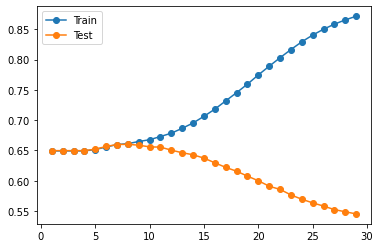

In [28]:
# Definición de las listas para colocar los scores obtenidos
train_scores, test_scores = list(), list()
# Definción de la máxima profundidad del arbol
values = [i for i in range(1, 30)]
for i in values:
	# Configuración del modelo
	model = DecisionTreeClassifier(max_depth=i, criterion = 'gini',min_samples_leaf=2)
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# Evaluación de los datos de entrenamiento
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# Evaluación en los datos de prueba
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# Valores obenidos apra cada profundidad
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# Gráfico de los datos de prueba y entrenamiento en función de la profundidad
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

##### Modelo árbol de decisión evaluado con criterio de Entropía

>1, train: 0.649, test: 0.650
>2, train: 0.649, test: 0.650
>3, train: 0.649, test: 0.650
>4, train: 0.649, test: 0.650
>5, train: 0.652, test: 0.652
>6, train: 0.656, test: 0.657
>7, train: 0.660, test: 0.659
>8, train: 0.662, test: 0.661
>9, train: 0.663, test: 0.660
>10, train: 0.666, test: 0.658
>11, train: 0.671, test: 0.656
>12, train: 0.676, test: 0.652
>13, train: 0.685, test: 0.647
>14, train: 0.695, test: 0.641
>15, train: 0.708, test: 0.637
>16, train: 0.723, test: 0.626
>17, train: 0.739, test: 0.619
>18, train: 0.757, test: 0.609
>19, train: 0.776, test: 0.598
>20, train: 0.794, test: 0.590
>21, train: 0.812, test: 0.580
>22, train: 0.828, test: 0.571
>23, train: 0.844, test: 0.564
>24, train: 0.857, test: 0.557
>25, train: 0.868, test: 0.550
>26, train: 0.876, test: 0.547
>27, train: 0.883, test: 0.545
>28, train: 0.889, test: 0.541
>29, train: 0.893, test: 0.539


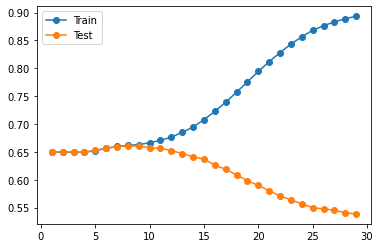

In [29]:
# Definición de las listas para colocar los scores obtenidos
train_scores, test_scores = list(), list()
# Definción de la máxima profundidad del arbol
values = [i for i in range(1, 30)]
for i in values:
	# Configuración del modelo
	model = DecisionTreeClassifier(max_depth=i, criterion = 'entropy',min_samples_leaf=2)
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# Evaluación de los datos de entrenamiento
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# Evaluación en los datos de prueba
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# Valores obenidos apra cada profundidad
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# Gráfico de los datos de prueba y entrenamiento en función de la profundidad
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

##### Modelo Random Forest evaluado con criterio de Gini

>1, train: 0.649, test: 0.650
>2, train: 0.649, test: 0.650
>3, train: 0.649, test: 0.650
>4, train: 0.649, test: 0.650
>5, train: 0.649, test: 0.650
>6, train: 0.649, test: 0.650
>7, train: 0.650, test: 0.651
>8, train: 0.657, test: 0.656
>9, train: 0.664, test: 0.661
>10, train: 0.668, test: 0.662
>11, train: 0.674, test: 0.664
>12, train: 0.682, test: 0.664
>13, train: 0.694, test: 0.664
>14, train: 0.708, test: 0.663
>15, train: 0.726, test: 0.663
>16, train: 0.748, test: 0.663
>17, train: 0.770, test: 0.662
>18, train: 0.793, test: 0.661
>19, train: 0.818, test: 0.661
>20, train: 0.842, test: 0.661
>21, train: 0.864, test: 0.659
>22, train: 0.887, test: 0.658
>23, train: 0.907, test: 0.658
>24, train: 0.927, test: 0.657
>25, train: 0.943, test: 0.656
>26, train: 0.959, test: 0.656
>27, train: 0.972, test: 0.655
>28, train: 0.980, test: 0.654
>29, train: 0.987, test: 0.652


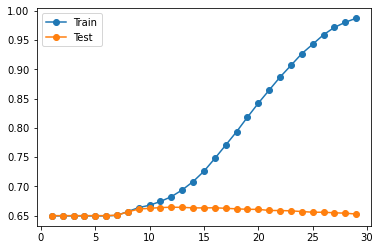

In [30]:
# Definición de las listas para colocar los scores obtenidos
train_scores, test_scores = list(), list()
# Definción de la máxima profundidad del arbol
values = [i for i in range(1, 30)]
for i in values:
	# Configuración del modelo
	model = RandomForestClassifier(max_depth=i, criterion = 'gini')
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# Evaluación de los datos de entrenamiento
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# Evaluación en los datos de prueba
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# Valores obenidos apra cada profundidad
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# Gráfico de los datos de prueba y entrenamiento en función de la profundidad
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

##### Modelo Random Forest evaluado con criterio de Entropy

>1, train: 0.649, test: 0.650
>2, train: 0.649, test: 0.650
>3, train: 0.649, test: 0.650
>4, train: 0.649, test: 0.650
>5, train: 0.649, test: 0.650
>6, train: 0.649, test: 0.650
>7, train: 0.651, test: 0.652
>8, train: 0.655, test: 0.655
>9, train: 0.663, test: 0.661
>10, train: 0.667, test: 0.662
>11, train: 0.673, test: 0.663
>12, train: 0.682, test: 0.664
>13, train: 0.694, test: 0.664
>14, train: 0.710, test: 0.664
>15, train: 0.730, test: 0.663
>16, train: 0.755, test: 0.664
>17, train: 0.781, test: 0.662
>18, train: 0.810, test: 0.662
>19, train: 0.839, test: 0.661
>20, train: 0.868, test: 0.660
>21, train: 0.895, test: 0.659
>22, train: 0.918, test: 0.658
>23, train: 0.939, test: 0.657
>24, train: 0.958, test: 0.657
>25, train: 0.972, test: 0.655
>26, train: 0.982, test: 0.654
>27, train: 0.990, test: 0.655
>28, train: 0.994, test: 0.654
>29, train: 0.997, test: 0.653


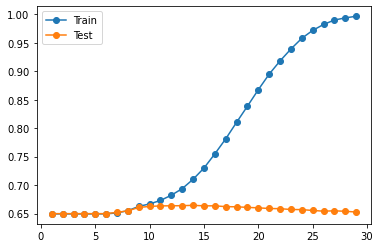

In [31]:
# Definición de las listas para colocar los scores obtenidos
train_scores, test_scores = list(), list()
# Definción de la máxima profundidad del arbol
values = [i for i in range(1, 30)]
for i in values:
	# Configuración del modelo
	model = RandomForestClassifier(max_depth=i, criterion = 'entropy')
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# Evaluación de los datos de entrenamiento
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# Evaluación en los datos de prueba
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# Valores obenidos apra cada profundidad
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# Gráfico de los datos de prueba y entrenamiento en función de la profundidad
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [32]:
#Cross validation
model = RandomForestClassifier(max_depth=10, criterion = 'entropy')
scores=cross_val_score(model,X_train,Y_train,cv=5, scoring='f1_macro')
print(scores)

[0.2805928  0.27616911 0.27865047 0.2760349  0.28282506]


#### Evaluación del modelo

In [21]:
RFpredfinal = RandomForestclassifier.predict(X_test)
cmRFF = confusion_matrix(Y_train,RFpred)
print('Matriz de confusión')
print(cmRFF)
print()
print('Métricas del modelo')
print(classification_report(Y_test, RFpredfinal))

Matriz de confusión
[[ 26895     17      2      0]
 [     7 115246      6      1]
 [     2     12  33947      0]
 [     0      1      1   1376]]

Métricas del modelo
              precision    recall  f1-score   support

         0.0       0.41      0.11      0.17     11596
         1.0       0.68      0.90      0.78     49434
         2.0       0.47      0.27      0.35     14489
         3.0       0.00      0.00      0.00       558

    accuracy                           0.65     76077
   macro avg       0.39      0.32      0.32     76077
weighted avg       0.60      0.65      0.60     76077

